In [60]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Intro to the Data
Deep dive into the data, discuss what data is missing, what each of the fields (or most of them mean. Also explain the basics of how the data was collected, the methodologies they used, etc. And also explain where you got the data (and credit the original authors of the data).

In [11]:
df = pd.read_csv('cancer_data.csv')
print(df.head())

  yearrt      med   maxeso  gender intake_who  age chemo  ott chemo3g gtv1  \
0   2010  17.0346  44.8989       0          2   67     1   21       2        
1   2014                         0          1   69         36                
2   2010                         1          1   82         24                
3   2013  17.2298  48.9217       1          1   77     1   36       2        
4   2013                         1          2   83         28                

        ...       CumultativeTotalTumorDose meanlungdose  lungv20 CumOTT  \
0       ...                           45.00      15.4178  33.8485     21   
1       ...                           67.00                           36   
2       ...                           52.25                           24   
3       ...                           69.00      25.0428  11.9888     36   
4       ...                           72.00                           28   

  OverallBaselineDysp OverallPostRTDyspFullScore DyspGT2 DeltaDyspGe1  \
0

In [13]:
df = df.replace(r'\s+', np.nan, regex=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 41 columns):
yearrt                        553 non-null object
med                           352 non-null object
maxeso                        352 non-null object
gender                        559 non-null int64
intake_who                    541 non-null object
age                           559 non-null int64
chemo                         451 non-null object
ott                           559 non-null int64
chemo3g                       451 non-null object
gtv1                          3 non-null object
tumorload                     331 non-null object
toxeso                        547 non-null object
toxesohigh2                   547 non-null object
pretoxeso                     551 non-null object
dose per fraction             233 non-null object
fractions                     233 non-null object
total dose                    233 non-null object
second dose per fracion       72 non-null object
s

In [15]:
for column in df:
    print(df[column].value_counts())


2011    130
2012    116
2010    110
2013    101
2014     42
2009     40
2008     12
2007      2
Name: yearrt, dtype: int64
13.7163    1
20.2781    1
9.8179     1
28.1087    1
16.729     1
8.7035     1
17.6185    1
9.8541     1
32.6145    1
8.9368     1
26.1256    1
14.9863    1
31.5016    1
20.9758    1
8.897      1
11.5518    1
25.1035    1
7.5611     1
4.7575     1
8.8475     1
21.6953    1
16.9525    1
8.4972     1
11.9243    1
19.5912    1
41.6299    1
19.5284    1
24.5907    1
15.6031    1
24.1799    1
          ..
24.7096    1
17.954     1
10.9659    1
22.0174    1
24.7208    1
10.8757    1
31.7449    1
23.8542    1
25.8203    1
13.8149    1
11.7622    1
11.7907    1
26.0641    1
9.2864     1
34.5197    1
17.8042    1
14.9898    1
15.1818    1
14.959     1
25.0058    1
9.33       1
9.3108     1
14.8465    1
18.3303    1
8.1679     1
30.8932    1
21.1507    1
21.3502    1
30.2071    1
11.9741    1
Name: med, dtype: int64
49.9979    1
49.5486    1
56.21      1
41.2267    1
32.1332 

In [102]:
print(df.groupby(['SmokingStatus'])['TwoYearSurvival'].sum())
print(df.groupby(['SmokingStatus'])['TwoYearSurvival'].count())
print(df['yearrt'].value_counts())
yr_2013 = df.loc[df['yearrt']==2013]
print(yr_2013['TwoYearSurvival'].value_counts())

SmokingStatus
0.0      7
1.0    109
2.0     54
Name: TwoYearSurvival, dtype: int64
SmokingStatus
0.0     14
1.0    319
2.0    131
Name: TwoYearSurvival, dtype: int64
2011.0    130
2012.0    116
2010.0    110
2013.0    101
2014.0     42
2009.0     40
2008.0     12
2007.0      2
Name: yearrt, dtype: int64
0    65
1    36
Name: TwoYearSurvival, dtype: int64


For the Two Year Survival outcome, there are 339 die and 220 live. This is fairly even and should not cause significant class imbalance.

1 IS SURVIVE, 0 IS DIE

In [62]:
sns.set(font_scale = 1.5)

scatter_palette = {1:'red', 2:'blue'}

g = sns.PairGrid(df, hue="TwoYearSurvival", palette = scatter_palette, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.7)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0.7))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

ValueError: First argument must be a sequence

In [90]:
plt.figure(figsize = (16,16))
sns.set(font_scale = 1)
ax = sns.heatmap(df)
plt.yticks(rotation=0)


g = sns.heatmap(data,linewidth=0,yticklabels=yticks,xticklabels=xticks)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)

#yticks = df.columns


#sns.heatmap(df,linewidth=0,yticklabels=yticks,xticklabels=xticks)
#plt.yticks(rotation=0) 

#plt.show()

ValueError: Arrays were different lengths: 41 vs 0

In [103]:
corrmat = df.corr()
print(corrmat['TwoYearSurvival'])

yearrt                       -0.198887
med                          -0.124601
maxeso                       -0.104804
gender                       -0.066701
intake_who                   -0.102559
age                          -0.067338
chemo                         0.053787
ott                           0.180136
chemo3g                       0.044269
gtv1                               NaN
tumorload                    -0.177023
toxeso                       -0.093582
toxesohigh2                  -0.073368
pretoxeso                     0.032043
dose per fraction             0.050494
fractions                     0.091325
total dose                    0.034500
second dose per fracion      -0.022480
second fractions              0.047052
second total dose             0.098626
BED                           0.049029
Modality                     -0.062833
PacksPerDay                  -0.119660
SmokingStatus                 0.037060
IsSCLC                             NaN
T_stage                  

Strongest covariance with outcome is -0.199, -0.177 for yearrt and tumorload. Yearrt is Year of RT, which means the year of receiving radiation therapy (RT). I would imagine that the higher the year, the more advanced the technology, and the higher then 2-year survival. However, the correlation is negative.

In [104]:
print(df.columns)

Index(['yearrt', 'med', 'maxeso', 'gender', 'intake_who', 'age', 'chemo',
       'ott', 'chemo3g', 'gtv1', 'tumorload', 'toxeso', 'toxesohigh2',
       'pretoxeso', 'dose per fraction', 'fractions', 'total dose',
       'second dose per fracion', 'second fractions', 'second total dose',
       'BED', 'Modality', 'PacksPerDay', 'SmokingStatus', 'IsSCLC', 'T_stage',
       'N_stage', 'M_stage', 'PA', 'Locatie', 'FEV',
       'CumultativeTotalTumorDose', 'meanlungdose', 'lungv20', 'CumOTT',
       'OverallBaselineDysp', 'OverallPostRTDyspFullScore', 'DyspGT2',
       'DeltaDyspGe1', 'TreatmentType', 'TwoYearSurvival'],
      dtype='object')


# Features

Yearrt: the year that the patient received radiation therapy. This ranges from 2007 to 2014. <br>

Med: ??? This ranges from 2.6862 to 49.0148. <br>

Maxeso: maximum dose received by any point of the esophagus. Measured in Gy. This ranges from 7.0901 to 79.2183.<br>

Gender: gender of the patient. Binary.<br>

Age: age of the patient. 33-90.

Chemo: whether or not the patient received chemotherapy. Binary. <br>

OTT: Overall Treatment Time. 1-96 months.<br>

Chemo3g: 3rd generation chemotherapy treatment. These include paclitaxel, docetaxel, gemcitabine, vinorelbine, and irinotecan. In another study from 2007, 3G monotherapy was shown to improve one-year survival in comparison with best standard care (BSC), but reporting and methodological limitations meant that these conclusions may not have been reliable. 0, 1, or 2??? <br>

GTV1: Initial gross tumor volume. Defined as the enhancing lesion and surrounding edema as visualized in diagnostic CT Scan. 4.92-61.94.<br>

Tumorload: Refers to the number of cancer cells, the size of a tumor, or the amount of cancer in the body. Also called tumor burden. Can be measured with ELISA or beta-gal immunoassay. 0.9813-1075.4356.<br>

Toxeso: Esophageal toxicity resulting from radiation. 0, 1, 2, 3, 4. Mostly dependent on maxeso and schedule of radiation therapy. Can negatively impact long term survival. Less common when given separately from chemotherapy. Level 3/4 is considered severe.<br>

Toxesohigh2: Binary category derived from whether esophageal toxicity was experienced above level 2 or not.<br>

Pretoxeso: ???? 0, 1, 2, 3.<br>

Dose per fraction: Amount of Gy per radiation course. Standard of care is 2 Gy/fraction, 5 fractions/week for total 60 Gy. 1.5-7.5.<br>

Fractions: Number of total radiation treatments over the treatment period. 4-44.<br>
Total Dose: Total amount of Gy for entire treatment course. 7.2-129.6.<br>

Second Dose per Fraction: In some cases, two fractions per day are used near the end of a course of treatment (hyperfractionation). Used on tumors that regenerate more quickly when they are smaller. Only 72 patients received this. 1.5-10.<br>

Second Fractions: The number of fractions in the treatment regimen that were given as the second fraction of the day? First fraction destroys cells in mitosis. Second fractions destroys cells entering mitosis. 1-30.<br>
Second Total Dose: Seems like this might be the total amount of Gy given in all second doses. 2-45.<br>

BED: Biologically Effective Dose, dependent on linear quadratic cell survival. 8.496-315.<br>

Modality: refers to type of treatment. chemo, radiation, etc. I think no way to know between 0,1,2, ask.<br>

PacksPerDay: Number of cigarette packs smoked per day, as estimated by the patient. 0-2.<br>

SmokingStatus: Not a smoker, occasional smoker, regular smoker. 0,1,2.<br>

IsSCLC: This study is on Non-small cell lung cancer, so I find it unusual that they included a category on whether the patient has small cell lung cancer. All entries are 0.<br>

T Stage: TNM system describes characteristics of NSCLC after treatment. T is for tumor size. T0=no sign of cancer. T1=tumor is contained within lung. T2=tumor is 3-5 cm or reaches into bronchus or visceral pleura. T3=tumor is 5-7 cm or reaches into chest wall, phrenic nerve, or pericardium. T4=over 7 cm or reaches into second lung, diaphragm, other surrounding areas.<br>

N Stage: N is for Node, and whether cancer has spread to lymph nodes. N0=lymph node is non-cancerous. N1=cancer cells in area where lungs join lymph nodes. N2=cancer in lymph nodes within affected chest area. N3=cancer in lymph nodes outside affected chest area.<br>

M Stage: M is for metastasis, when the cancer spreads to another part of the body. M0=cancer has not spread outside initial area. M1=cancer has spread. All 0 in this cohort.<br>

PA: ??? Binary.<br>

Locatie: 0,1,2,3. ???<br>

FEV: Forced Expiratory Volume. The maximum volume of air breathed out in 1 second. This is impaired when pulmonary function is reduced due to disease burden. 25-138.<br>

CumulativeTotalTumorDose: 1.5-129.6. There is another category called Total Dose that ranges from 7.2-129.6. That category only has 233 observations, and this cateogry has 559 so I will keep this one.<br>

Mean Lung Dose: The mean amount of radiation delivered to the lung for all doses/fractions. 1.5949-34.6335 Gy. 15-20 Gy is average.<br>

Lungv20: Percentage of lung volume receiving radiation doses of 20 Gy or more. If too high, patient experiences pneumonitis. Under 33% is considered safe, under 22% is considered very little risk. 0-50.9581.<br>

CumOTT: Cumulative Overall Treatment Time. 1-96 months. This confirms to me that some features are redundant due to multiple sources of data being combined. This feature is unnecessary. <br>

OverallBaselineDysp: Dyspnea is difficult or labored breathing. This could also be dysphagia, labored swallowing. This is evaluated at the beginning of treatment? 0-3 out of possible 5.<br>

OverallPostRTDyspFullScore: Severity of dyspnea evaluated after treatment. 0,1,2,3,4,5.<br>

DyspGT2: ??? Binary<br>

DeltaDyspGel: ??? Binary<br>

TreatmentType: ??? Only 2 in this cohort.<br>

TwoYearSurvival: Whether or not the patient survived 2 years after starting radiation therapy treatment. 0 is die, 1 is survive.

In [126]:
df = df.apply(pd.to_numeric, errors="coerce")
    
import numpy as np

for column in df:
    df.index.name = column
    print(df.index.name)
    print(f'Minimum: {df[column].min()}')
    print(f'Maximum: {df[column].max()}\n')
    
toxeso = df.loc[df['toxeso'] >= 3]
print(toxeso.shape)

toxesohigh2 = df.loc[df['toxesohigh2'] == 1]
print(toxesohigh2.shape)
    



yearrt
Minimum: 2007.0
Maximum: 2014.0

med
Minimum: 2.6862
Maximum: 49.0148

maxeso
Minimum: 7.0901
Maximum: 79.2183

gender
Minimum: 0
Maximum: 1

intake_who
Minimum: 0.0
Maximum: 4.0

age
Minimum: 33
Maximum: 90

chemo
Minimum: 0.0
Maximum: 1.0

ott
Minimum: 1
Maximum: 96

chemo3g
Minimum: 0.0
Maximum: 2.0

gtv1
Minimum: 4.92
Maximum: 61.94

tumorload
Minimum: 0.9813
Maximum: 1075.4356

toxeso
Minimum: 0.0
Maximum: 4.0

toxesohigh2
Minimum: 0.0
Maximum: 1.0

pretoxeso
Minimum: 0.0
Maximum: 3.0

dose per fraction
Minimum: 1.5
Maximum: 7.5

fractions
Minimum: 4.0
Maximum: 44.0

total dose
Minimum: 7.2
Maximum: 129.6

second dose per fracion
Minimum: 1.5
Maximum: 10.0

second fractions
Minimum: 1.0
Maximum: 30.0

second total dose
Minimum: 2.0
Maximum: 45.0

BED
Minimum: 8.496
Maximum: 315.0

Modality
Minimum: 0.0
Maximum: 2.0

PacksPerDay
Minimum: 0.0
Maximum: 2.0

SmokingStatus
Minimum: 0.0
Maximum: 2.0

IsSCLC
Minimum: 0
Maximum: 0

T_stage
Minimum: 0.0
Maximum: 3.0

N_stage
Minimum

# Intro

This data comes from a 2017 study of historical patient data from 2 cohorts of of non-small cell lung cancer patients treated with (chemo)radiotherapy. This includes 559 patients at the Maastro clinic in the Netherlands, and 139 at the University of Manchester, UK. However, only the data fram the first cohort at Maastro clinic has been made publicly available. The original authors, Arthur Jochems et. al, used this data to develop a predictive model for patient survival using a Bayesian network. Tney validated it using testing data from a 3rd cohort from University of Michigan.<br>

Recent research has illuminated several features that have an effect on patient prognosis. These include performance status, weight loss, presece of comorbidity, chemotherapy in combination with radiation, dose of radiation, size of tumor, features derived from tumor imaging data, and the radiomics approach. Despite these numerous factors, the TNM system of classification is widely regarded as the most valuable feature predictor for patient survival. The TNM system describes the size of the tumor, the severity of lymphatic involvement, and whether the cancer has metastasized to other parts of the body beyond the initial site of malignancy. Typically, TNM is evaluated by the doctor using a defined set of guidelines *following surgical tumor resection*. In this study, TNM was evaluated by the doctor at the end of each patient's non-invasive CRT or RT treatment regimen. Because the TNM system for NSCLC was designed with surgery in mind, the observations derived from a non-invasive treatment modality may not have the same predictive power. In fact, studies have indicated that the TNM system performs poorly for patients receiving CRT or RT.

Amongst the 41 features in this study, select few features have a complete or near complete representation of the entire cohort. Thorough data is provided for the year of treatment, age, gender, overall treatment time, whether the patient received chemotherapy as well as radiation, esophageal toxicity and pretoxicity, modality, smoking status, TNM classification measures, PA, locatie, cumulative tumor dose, level of dyspnea before and after treatment, dyspGT2, deltadyspgel, and two year survival. While the amount of missing data for other categories may prove to be a obstacle for evaluating this dataset, we should note that we have a significant amount of data available for our two most relevant features: TNM classification and the outcome, two year survival.


The data was collected as part of an IRB-approved and registered clinical trial. Patients with inoperable NSCLC were treated between 2007 to 2014. The patients received different schedules of dosing for their radiation, and some were treated with chemotherapy at different points in their treatment. 189 patients were treated using sequential CRT, completing a chemotherapy schedule before starting radiation at a cumulative dose of 54.0 to 79.2 Gy (fractions of 1.8 Gy, twice daily, until the mean lung dose or maximum dose to the spinal cord was reache)d. 283 patients were treated using concurrent CRT, receiving chemotherapy and radiation at the same time at a cumulative dose of 45 Gy (fractions of 1.5 Gy, twice daily). This treatment was followed by an individualized dose ranging from 8 to 24 Gy (fractions of 2.0 Gy, once daily, until the normal tissue dose constraints were reached). The remaining patients received an individualized regimen, some receiving conformal RT with and without chemotherapy.

# Thesis

Given that the TNM classification is the gold standard in survival risk stratification, I hypothesize that these will be the strongest indicator of patient survival, even though they weren't designed for inoperable patients. Instinctively, I would also hypothesize that smoking status has an effect on survival, because smoking will directly interfere with the treatment regimen and aggravate the cancer.<br>

Initial gross tumor volume (GTV1) and tumor load also look like they will reveal a significant relationship with the outcome. They are both directly related to the Tumor part of TNM classification, which I hypothesize will be the strongest set of indicators. All 3 of these feature are derived from tumor size, so they may not individually provide enough unique information and may actually end up complicating the model.<br>

I don't expect any information related to dosing quantity or schedule to have much effect on patient survival because every patient has such vastly different needs, background, and reactions to medication.<br>

Forced Expiratory Volume (FEV) is a valuable indicator for impaired pulmonary function and thus disease burden. However, I don't expect this feature to have much significance for the outcome because each patient has a different starting lung capacity. If this feature were change in forced expiratory volume over time, that would be a much more useful feature.<br>

# Exploratory Analysis

Exploratory Analysis -- this is where you start looking at the correlations, histograms of the data, start running some classifiers such as Lasso/Ridge  logistic regression, decision trees, etc, etc. Be sure to explain the intuition behind why you're looking into a particular part of the data, or trying to use certain types of models for the survival prediction. e.g. there are a lot of features, many of which might not be useful, so I'll initially use Lasso regression to train a basic model and drop unneeded features at the same time. And have some (very) basic discussion on the results.

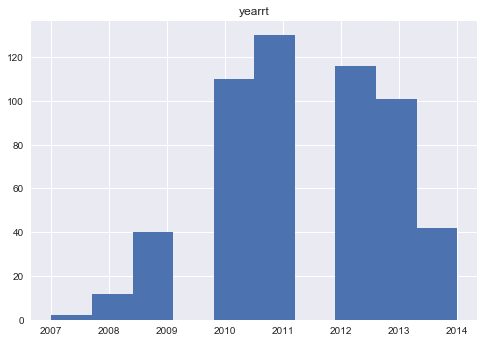

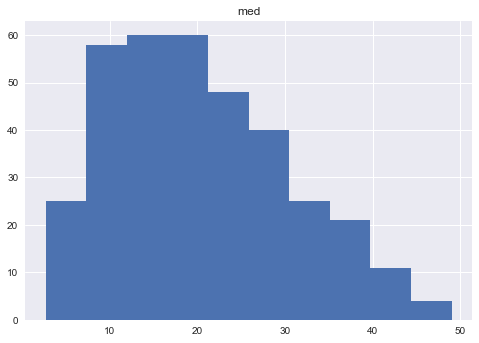

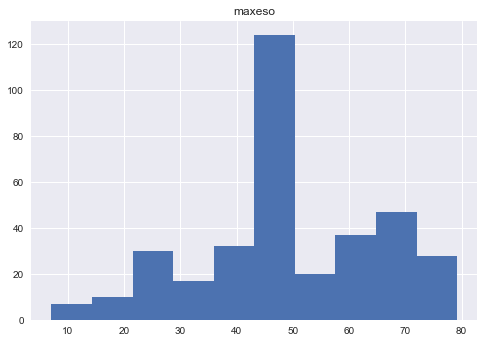

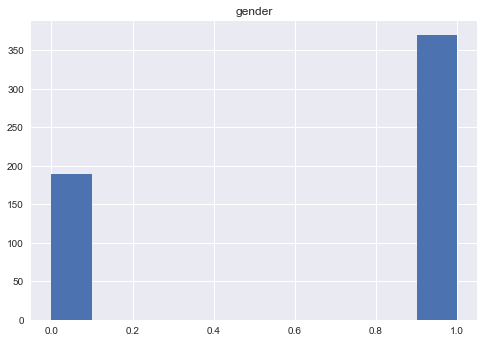

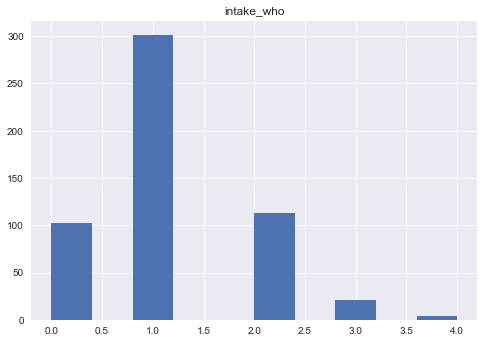

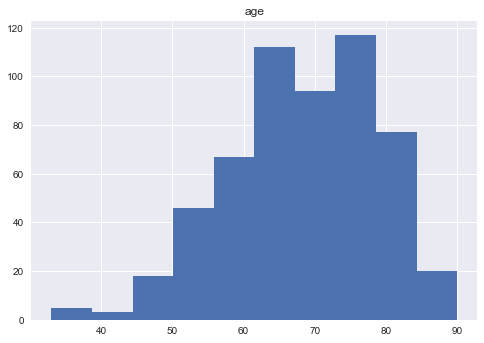

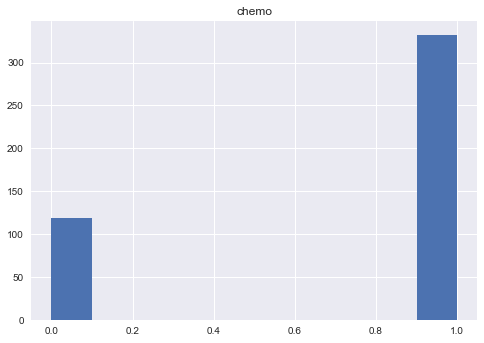

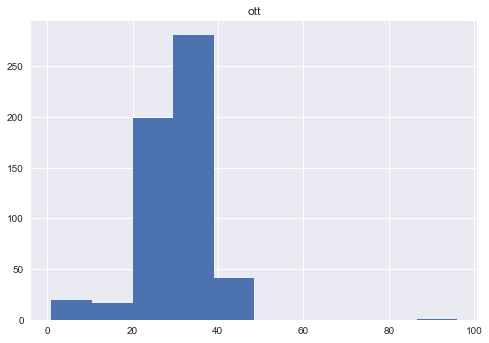

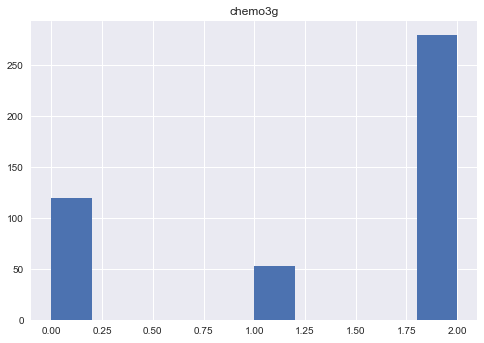

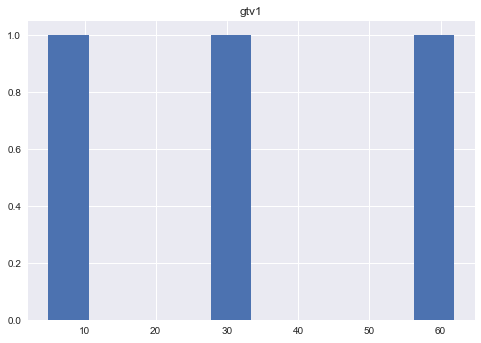

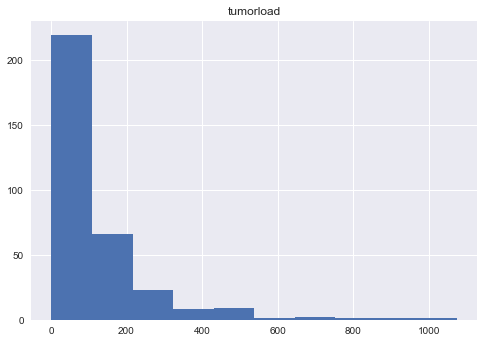

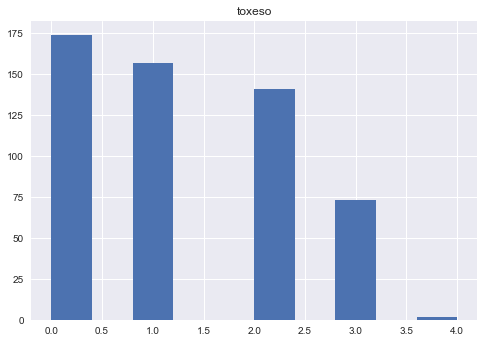

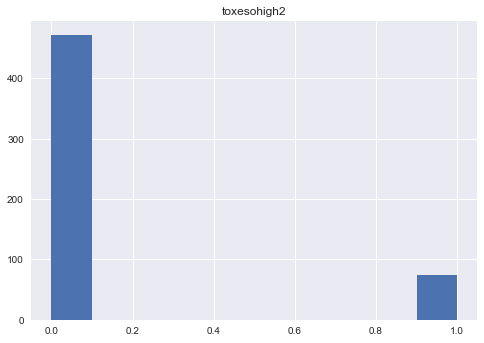

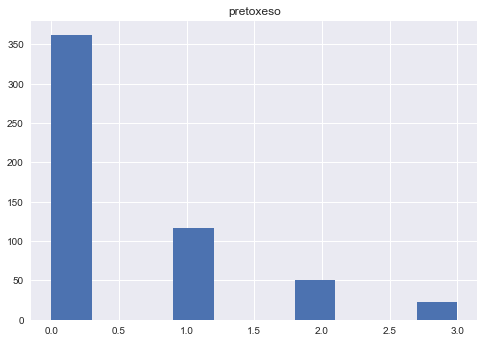

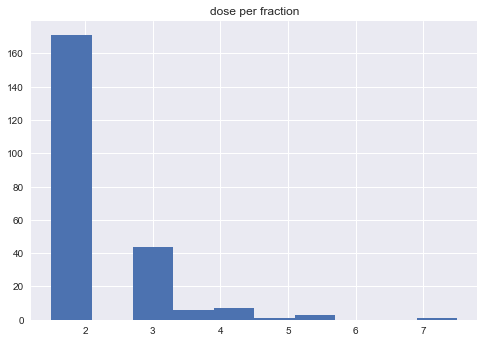

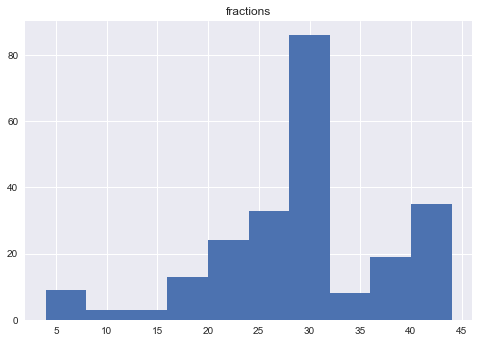

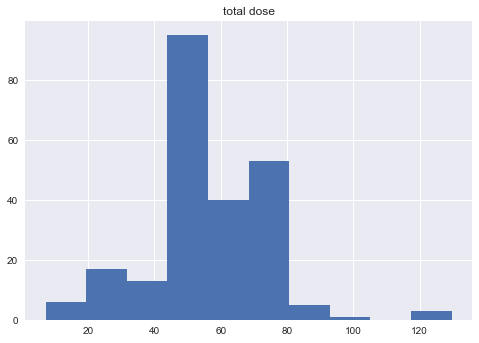

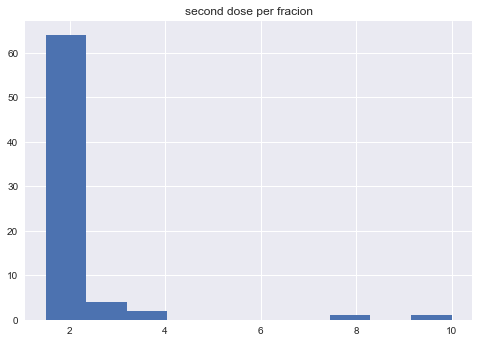

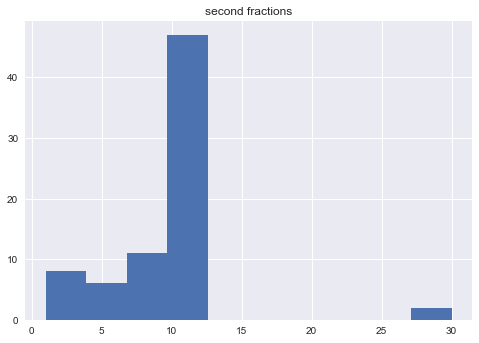

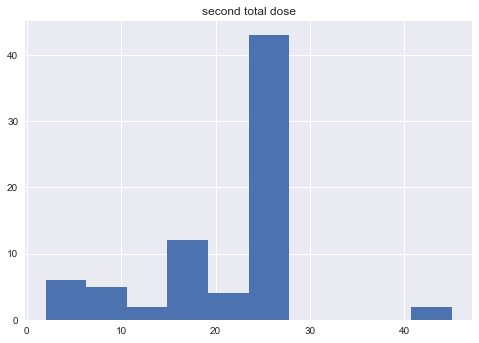

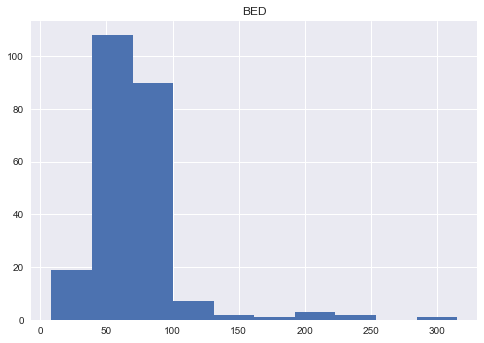

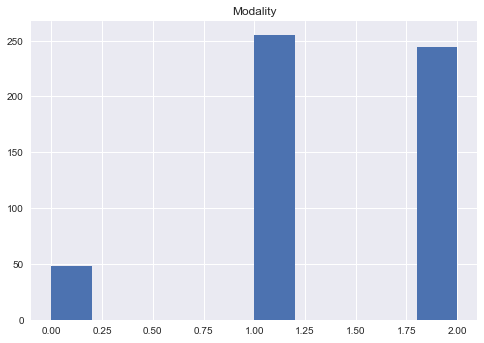

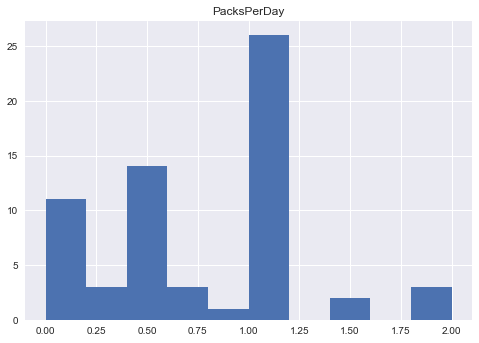

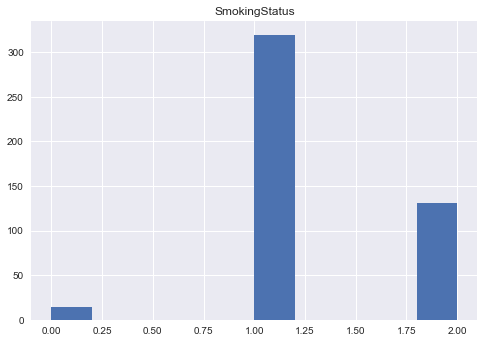

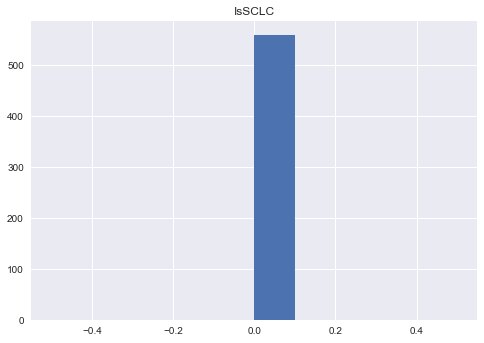

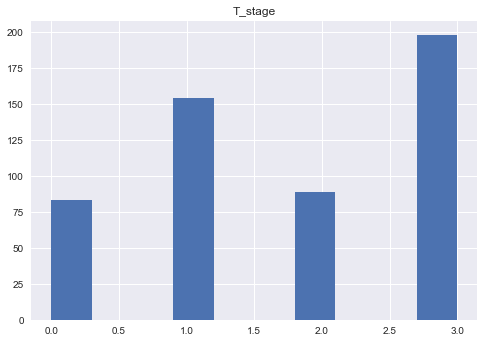

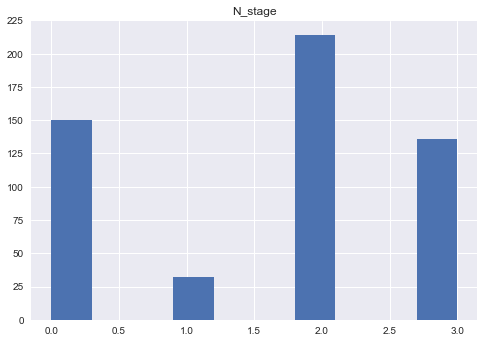

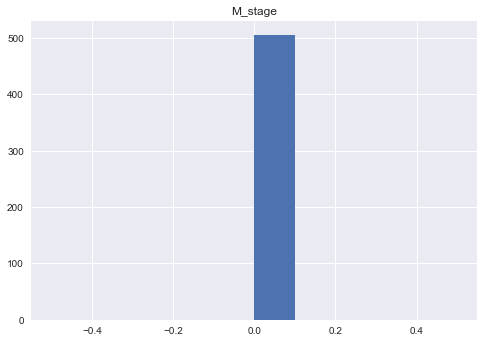

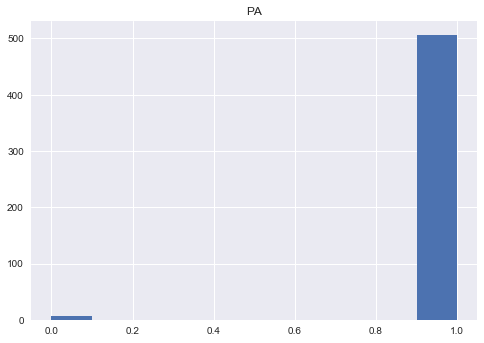

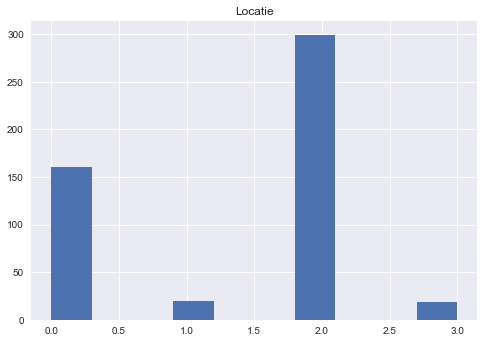

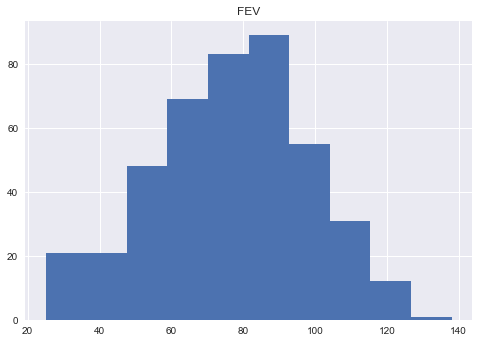

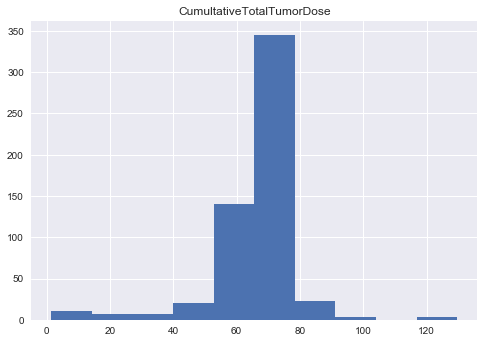

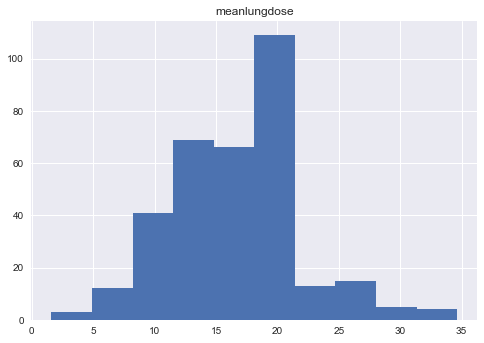

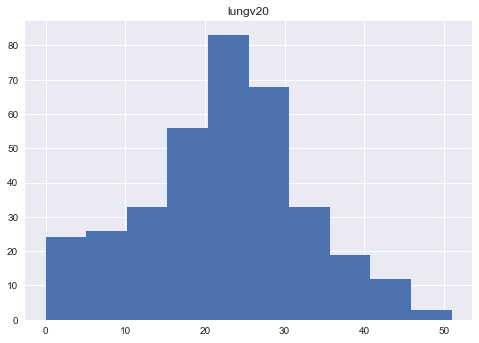

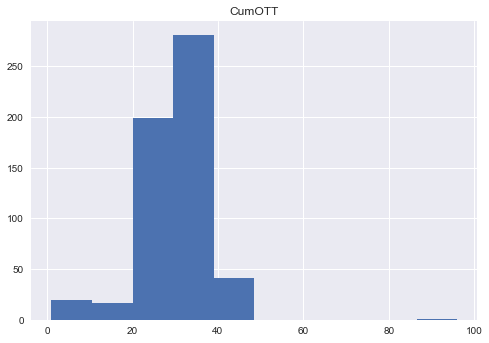

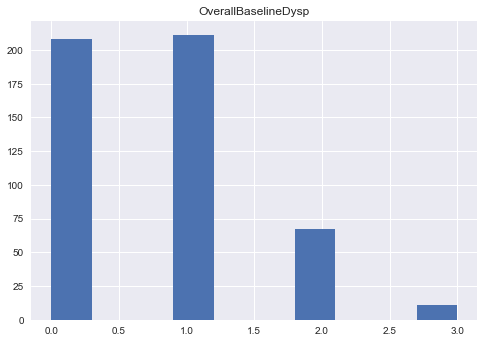

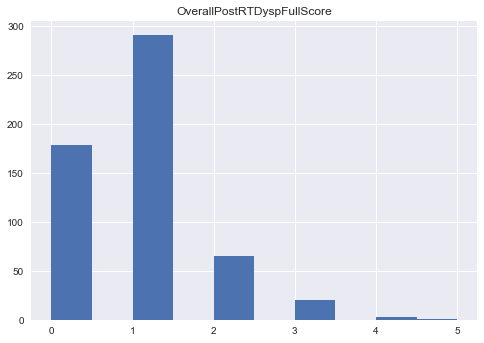

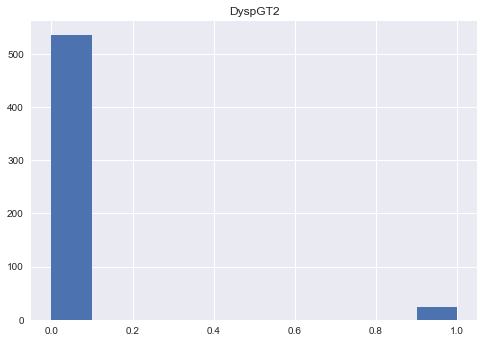

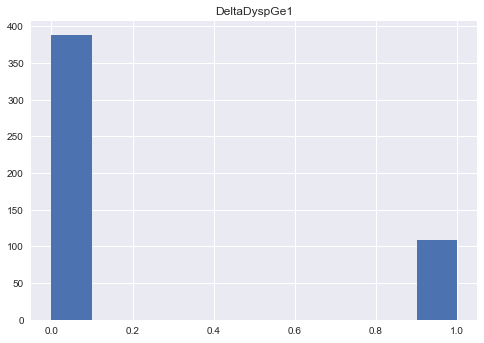

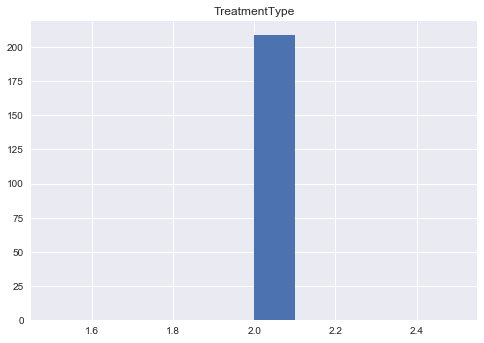

In [127]:
input = df.drop(['TwoYearSurvival'], axis=1)
input = input.apply(pd.to_numeric, errors = 'coerce')
df = df.apply(pd.to_numeric, errors = 'coerce')

for column in input:
    plt.hist(input[column].dropna())
    plt.title(column)
    plt.show()

There are more patients in the more recent years of the study. These patients may end up living longer since they are being treated with more state of the art technology. While this may skew the data towards survival, technology is always improving, and we would likely see that happen in most data sets. In this study, all patients are undergoing standard NSCLC protocol, so we may not see that year of treatment has any effect on survival.<br>

There is a relatively normal age distribution, with the majority of patients ranging from 65-75. More people received chemotherapy than did not receive chemotherapy. Although the overall treatment time ranges from 1-96 months, there is only one observation at 96 months; the rest of the patients fall under 50 months, which is about 4 years.<br>

GTV1 might have been a good feature, but the histogram reveals that it has only 3 datapoints. The tumorload has a near exponential decrease, which means that most patients have a relatively low tumor load. The toxeso histogram shows that zero esophageal toxicity is most common, with high numbers of patients at levels 1 and 2 as well. Few patients have severe toxicity at 3, and only 1 patients has level 4.<br>

The dose per fraction also maxes out at the beginning. From a medical perspective, the lower the dose the better, only the minimum biological effective dose should be used to help prevent side effects and complications. The same trend is seen in second dose per fraction. The number of total fractions given is more varied; it peaks, drops, and rises again. The same trned is seen in total dose.<br>

For people who smoke, the common quantity to consume is 1 pack per day. The next most common quantity is 1/2 pack per day, and shortly behind that is 0 packs (non-smokers).<br>

There is a healthy distribution of values for both T and N classifications, which will help to build a reliable model. There is, however, only 1 value for the M classification, so this feature will likely not make the cut in the final model.<br>

FEV has a near perfect normal distribution, which may make it a good feature to include.

Cumulative total tumor dose has a much more normal distribution than total tumor dose, which makes sense because it has over double the number of observations. The normal distribution might make this another good feature to include.<br>

Lungv20 has a normal distribution as well. This makes intuitive sense because this metric should be targeted to deliver as much medicine to the lungs as possible, but if too much is given the patient will develop pneumonitis. The distribution should therefore be centered around the middle.<br>

More patients tended not to have dyspnea at baseline, with the majority of values falling at 0 or 1. The patients that did have dyspnea likely started with a stronger disease burden, which may correlate to their survival. 

In [130]:
sns.set(font_scale = 1.5)

scatter_palette = {1:'red', 2:'blue'}

g = sns.PairGrid(df, hue="TwoYearSurvival", diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.7)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0.7))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

LinAlgError: Arrays cannot be empty